In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score 
from pgmpy.base import DAG
from IPython.display import Image, display
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import  BicScore, AICScore

# Introduction

# Theoretical Introduction

## Bayesian network

A Bayesian network is a type of probabilistic graphical model that represents a set of variables and their conditional dependencies through a directed acyclic graph (DAG). In a Bayesian network, each node represents a random variable, while each edge (or directed link) represents a conditional dependency between these variables. This structure is particularly useful for modeling complex systems where multiple factors interact with each other, allowing for a visual and computational approach to understand how different factors influence one another.

The primary components of a Bayesian network are:
- Nodes (Variables): Each node in the network represents a specific variable, such as age, smoking status, or a health condition like diabetes. These variables can be categorical or continuous.
- Edges (Dependencies): Directed edges between nodes represent conditional dependencies. For instance, if there is a directed edge from smoking status to hypertension, this suggests that smoking status is conditionally dependent on hypertension, implying that the likelihood of having hypertension may vary based on smoking habits.
- Conditional Probability Tables (CPTs): Each node in the network is associated with a conditional probability table that quantifies the strength of dependencies. For example, a node representing hypertension might include probabilities for the likelihood of having hypertension given different levels of physical activity.

Bayesian networks use Bayes' theorem to update the probabilities of different outcomes when new evidence is introduced. This feature is especially powerful in situations where the data is uncertain or incomplete, as it allows the network to calculate the most likely values of unknown variables based on the observed data.

__Why Bayesian Networks Are Useful?__

Bayesian networks are ideal for applications where multiple factors interact in uncertain ways, such as in medicine, genetics, and risk assessment. They are particularly valuable for:

- Making Inferences: Bayesian networks can predict the likelihood of certain events or conditions based on observed variables. For example, if a patient's age and smoking status are known, a Bayesian network could estimate their risk of developing hypertension.

- Visualizing Dependencies: By representing dependencies graphically, Bayesian networks provide insights into how variables relate to each other. This can reveal both direct and indirect influences on an outcome, helping identify the most critical factors.

- Handling Uncertainty: Since Bayesian networks are probabilistic, they can effectively model scenarios with incomplete or noisy data, updating predictions as more information becomes available.

In the context of this project on cardiovascular health, a Bayesian network can help identify which lifestyle factors and medical conditions are most influential in cardiovascular disease risk. By examining these probabilistic dependencies, we gain insights into the complex interactions among risk factors, allowing us to make more informed predictions and recommendations.

# Exploratory data analysis

The first part of the work plan involves performing an **exploratory data analysis** on the dataset to understand the characteristics and distributions of each variable. This step is essential for gaining initial insights into the data.

The relevant variables are grouped as follows:
- __Non-modifiable__ CV risk factors: sex, age, education level, and socioeconomic status
- __Modifiable__ CV risk factors: body mass index, physical activity, sleep duration, smoking
profile, anxiety, and depression
- __Medical conditions__: hypertension, hypercholesterolemia, and diabetes


First of all, it's important to note the particularities of the dataset, such as its size and the variables available in the dataset.

In [2]:
df = pd.read_csv('cardiovascular_train.csv')
print("Dataset length: ", len(df))
print("Dataset variables: ",[k for k in df.keys()])

Dataset length:  3845
Dataset variables:  ['Age', 'Anxiety', 'BodyMassIndex', 'Depression', 'Diabetes', 'EducationLevel', 'Hypercholesterolemia', 'Hypertension', 'PhysicalActivity', 'Sex', 'SleepDuration', 'SmokerProfile', 'SocioeconomicStatus']


After checking that all the variables are present in the dataset, it is now possible to analyze each one in particular.

## Non-modifiable variables

### Age

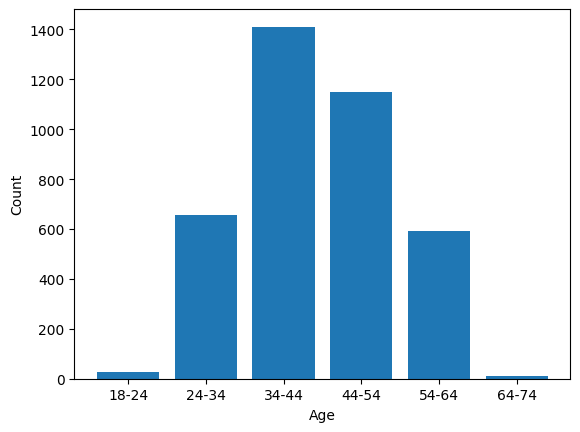

Age
18-24      28
24-34     655
34-44    1411
44-54    1148
54-64     594
64-74       9
Name: count, dtype: int64


In [3]:
age_counts = df['Age'].value_counts()

# Sorting the index for ordered display (optional)
age_counts = age_counts.sort_index()

# Creating the bar plot
plt.bar(age_counts.index, age_counts.values)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()
print(age_counts)

### EducationLevel

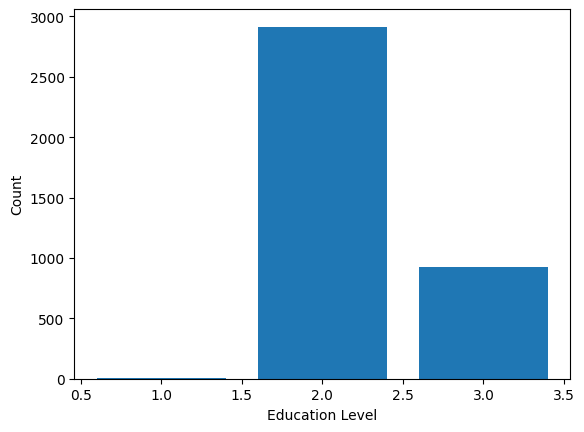

EducationLevel
1       5
2    2914
3     926
Name: count, dtype: int64


In [4]:
el_counts = df['EducationLevel'].value_counts()

# Sorting the index for ordered display (optional)
el_counts = el_counts.sort_index()

# Creating the bar plot
plt.bar(el_counts.index, el_counts.values)

# Adding labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.show()
print(el_counts)

### Sex

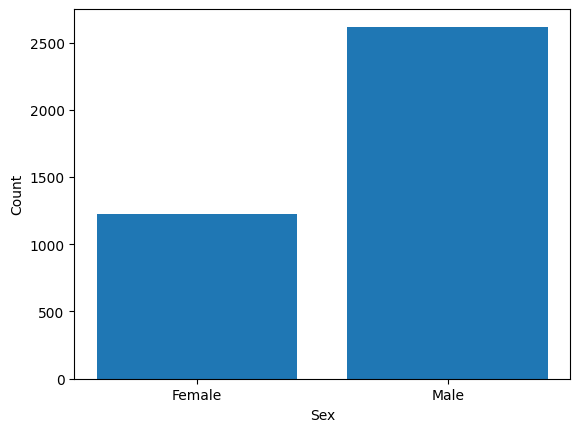

Sex
Female    1227
Male      2618
Name: count, dtype: int64


In [5]:
sex_counts = df['Sex'].value_counts()

# Sorting the index for ordered display (optional)
sex_counts = sex_counts.sort_index()

# Creating the bar plot
plt.bar(sex_counts.index, sex_counts.values)

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()
print(sex_counts)

### SocioeconomicStatus

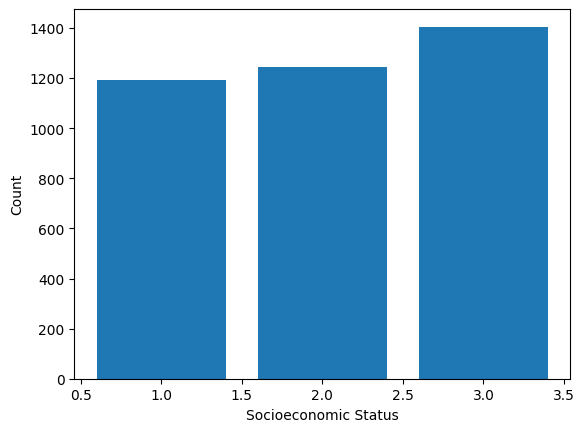

SocioeconomicStatus
1    1194
2    1246
3    1405
Name: count, dtype: int64


In [6]:
ss_counts = df['SocioeconomicStatus'].value_counts()

# Sorting the index for ordered display (optional)
ss_counts = ss_counts.sort_index()

# Creating the bar plot
plt.bar(ss_counts.index, ss_counts.values)

# Adding labels and title
plt.xlabel('Socioeconomic Status')
plt.ylabel('Count')

# Show the plot
plt.show()
print(ss_counts)

## Modifiable variables

### Anxiety

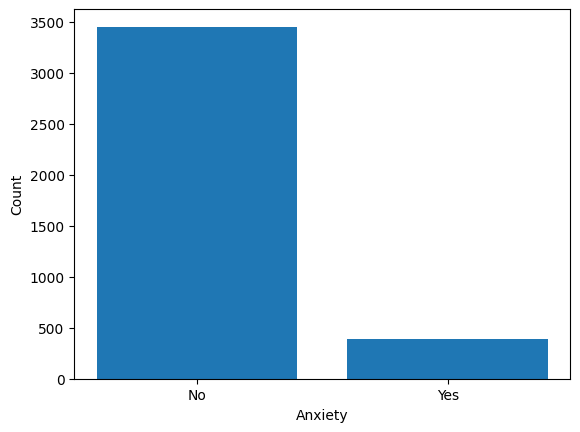

Anxiety
No     3454
Yes     391
Name: count, dtype: int64


In [7]:
anx_counts = df['Anxiety'].value_counts()

# Sorting the index for ordered display (optional)
anx_counts = anx_counts.sort_index()

# Creating the bar plot
plt.bar(anx_counts.index, anx_counts.values)

# Adding labels and title
plt.xlabel('Anxiety')
plt.ylabel('Count')

# Show the plot
plt.show()
print(anx_counts)

### BodyMassIndex

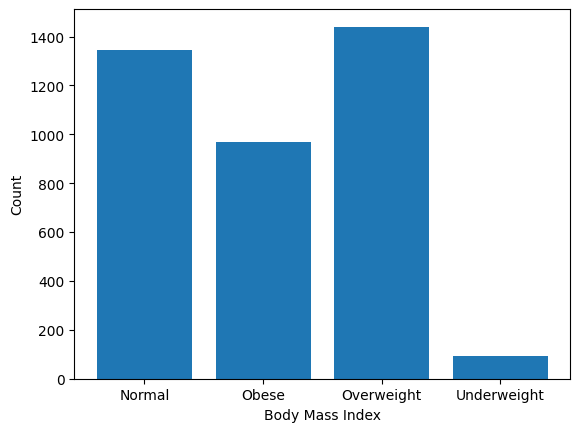

BodyMassIndex
Normal         1344
Obese           968
Overweight     1440
Underweight      93
Name: count, dtype: int64


In [8]:
bmi_counts = df['BodyMassIndex'].value_counts()

# Sorting the index for ordered display (optional)
bmi_counts = bmi_counts.sort_index()

# Creating the bar plot
plt.bar(bmi_counts.index, bmi_counts.values)

# Adding labels and title
plt.xlabel('Body Mass Index')
plt.ylabel('Count')

# Show the plot
plt.show()
print(bmi_counts)

### Depression

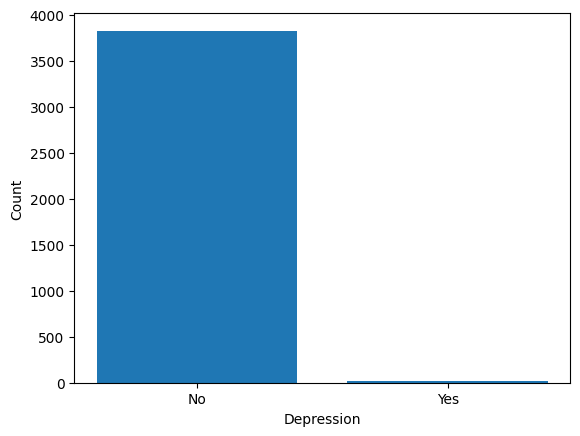

Depression
No     3824
Yes      21
Name: count, dtype: int64


In [9]:
dp_counts = df['Depression'].value_counts()

# Sorting the index for ordered display (optional)
dp_counts = dp_counts.sort_index()

# Creating the bar plot
plt.bar(dp_counts.index, dp_counts.values)

# Adding labels and title
plt.xlabel('Depression')
plt.ylabel('Count')

# Show the plot
plt.show()
print(dp_counts)

### PhysicalActivity

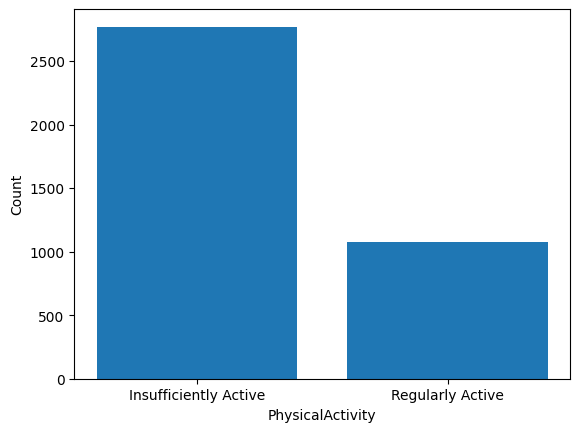

PhysicalActivity
Insufficiently Active    2770
Regularly Active         1075
Name: count, dtype: int64


In [10]:
pa_counts = df['PhysicalActivity'].value_counts()

# Sorting the index for ordered display (optional)
pa_counts = pa_counts.sort_index()

# Creating the bar plot
plt.bar(pa_counts.index, pa_counts.values)

# Adding labels and title
plt.xlabel('PhysicalActivity')
plt.ylabel('Count')

# Show the plot
plt.show()
print(pa_counts)

## SleepDuration

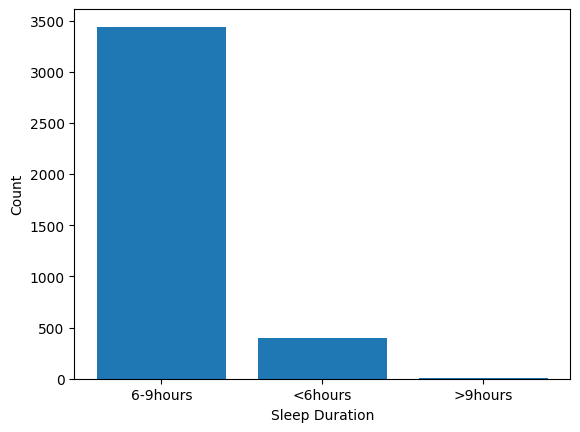

SleepDuration
6-9hours    3440
<6hours      401
>9hours        4
Name: count, dtype: int64


In [11]:
sd_counts = df['SleepDuration'].value_counts()

# Sorting the index for ordered display (optional)
sd_counts = sd_counts.sort_index()

# Creating the bar plot
plt.bar(sd_counts.index, sd_counts.values)

# Adding labels and title
plt.xlabel('Sleep Duration')
plt.ylabel('Count')

# Show the plot
plt.show()
print(sd_counts)

## SmokerProfile

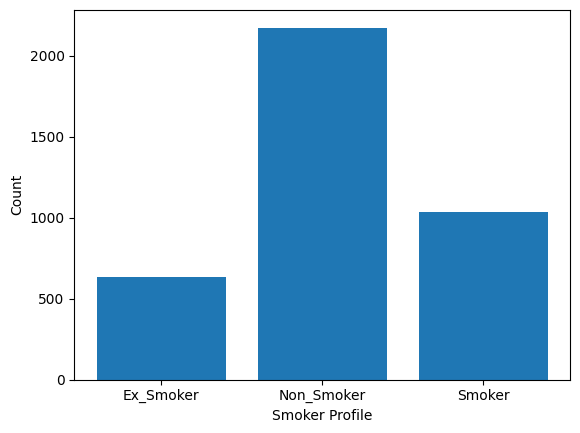

SmokerProfile
Ex_Smoker      632
Non_Smoker    2175
Smoker        1038
Name: count, dtype: int64


In [12]:
sp_counts = df['SmokerProfile'].value_counts()

# Sorting the index for ordered display (optional)
sp_counts = sp_counts.sort_index()

# Creating the bar plot
plt.bar(sp_counts.index, sp_counts.values)

# Adding labels and title
plt.xlabel('Smoker Profile')
plt.ylabel('Count')

# Show the plot
plt.show()
print(sp_counts)

### Conclusions

- Anxiety and depression are medical conditions, although they are not the focus here. These variables take only two values, ‘yes’, the patient suffers from this condition, or ‘no’, otherwise.
- __10.17%__ of patients have __anxiety__
- __0.54%__ of patients have __depression__
- 3845

- The sleep duration variable can assume 3 values: 6-9hours, <6hours and >9hours
- __89.47%__ of patients sleep __6-9hours__
- __10.43%__ of patients sleep __<6hours__
- __only 4__ patients sleep __>9hours__

- The smoke profile variable can assume 3 values: non-smoker, smoker and ex-smoker
- __16.43%__ of patients are __ex-smokers__
- __56.57%__ of patients are __non-smokers__
- __27.00%__ of patients have __smokers__

## Medical Conditions

### Diabetes

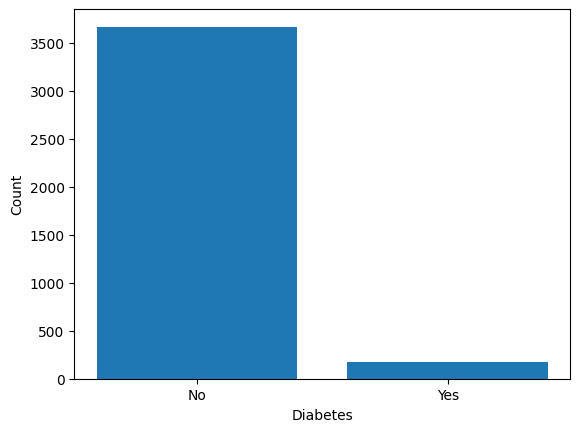

Diabetes
No     3669
Yes     176
Name: count, dtype: int64


In [13]:
db_counts = df['Diabetes'].value_counts()

# Sorting the index for ordered display (optional)
db_counts = db_counts.sort_index()

# Creating the bar plot
plt.bar(db_counts.index, db_counts.values)

# Adding labels and title
plt.xlabel('Diabetes')
plt.ylabel('Count')

# Show the plot
plt.show()
print(db_counts)

### Hypercholesterolemia

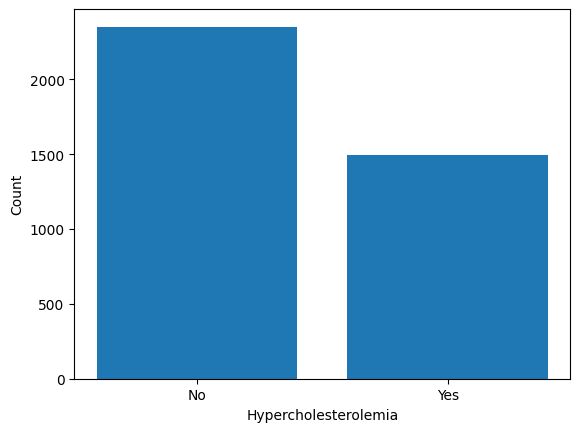

Hypercholesterolemia
No     2351
Yes    1494
Name: count, dtype: int64


In [14]:
hc_counts = df['Hypercholesterolemia'].value_counts()

# Sorting the index for ordered display (optional)
hc_counts = hc_counts.sort_index()

# Creating the bar plot
plt.bar(hc_counts.index, hc_counts.values)

# Adding labels and title
plt.xlabel('Hypercholesterolemia')
plt.ylabel('Count')

# Show the plot
plt.show()
print(hc_counts)

### Hypertension

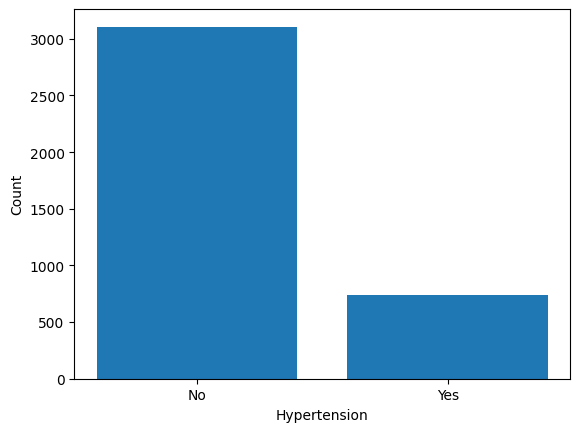

Hypertension
No     3107
Yes     738
Name: count, dtype: int64


In [15]:
ht_counts = df['Hypertension'].value_counts()

# Sorting the index for ordered display (optional)
ht_counts = ht_counts.sort_index()

# Creating the bar plot
plt.bar(ht_counts.index, ht_counts.values)

# Adding labels and title
plt.xlabel('Hypertension')
plt.ylabel('Count')

# Show the plot
plt.show()
print(ht_counts)

### Conclusions

- The 3 variables vary between yes and no, meaning that a patient has this medical condition or not, respectively.
- __4.57%__ of patients have __diabetes__
- __38.86%__ of patients have __hypercholesterolemia__
- __19.19%__ of patients have __hypercholesterolemia__

# Learn a Bayesian network from the data

The second part of this project is dedicated to constructing a Bayesian network model from the dataset to capture the dependencies and relationships between different factors presented in this problem.

This process requires careful consideration, as the Bayesian network may have relationships that are not intuitively plausible, such as linking body mass index as a cause of age, which is unlikely. In such cases, adjustments can be made to force certain connections that align with established medical understanding, like the influence of physical activity on conditions such as hypertension or hypercholesterolemia. However, it’s important to limit these manual modifications to avoid introducing bias and to rely predominantly on the algorithm to learn the structure autonomously.

The constructed network will serve as a powerful tool for examining complex dependencies and for conducting in-depth analyses. For example, we will be able to investigate how age affects sleep duration, assess the impact of smoking on various medical conditions, and determine how body mass index influences diabetes, hypertension, and hypercholesterolemia. By understanding these dependencies, this Bayesian network can provide valuable insights into cardiovascular disease risk profiles, helping to identify the most critical factors that contribute to these conditions. 


## Structure learning

To learn model structure (a DAG) from a dataset, there are two broad techniques:
* score-based structure learning
* constraint-based structure learning

The combination of both previous techniques allows further improvement, which is called hybrid structure learning.

Structure learning frames model selection as an optimization problem. It has two building blocks:
* A *scoring function* that maps models to a numerical score, based on how well they fit to a given dataset.
* A *search strategy* to traverse the search space of possible models $M$ and select a model with optimal score.

There are several algorithms for structure discovery, such as:
1. **PC:** is a constraint-based algorithm that utilizes Conditional Independence tests to construct the model.
3. **Hill-Climb Search:** is a greedy optimization-based algorithm that makes iterative local changes to the model structure such that it improves the overall score of the model
4. **Exhaustive Search:** iterates over all possible network structures on the given variables to find the most optimal one. As it tries to enumerate all possible network structures, it is intractable when the number of variables in the data is large.

The PC algorithm is unsuitable when score-based optimization is crucial because it relies on conditional independence tests rather than directly evaluating model fit. This makes it sensitive to errors in independence decisions, especially with noisy or small datasets, and prevents ranking structures by quality. Unlike score-based methods, the PC algorithm lacks flexibility and robustness, making it less effective for precise, data-driven model selection, so let's just consider the differences between Hill-Climb Search and Exhaustive Search.

### Hill-Climb Search vs Exhaustive Search

Below are the main differences between these two strategies:

| Feature                   | Hill-Climb Search                    | Exhaustive Search                   |
|---------------------------|------------------------------------------|-------------------------------------|
| **Search Strategy**       | Iterative, local optimization           | Complete exploration of search space |
| **Computational Cost**    | Low to moderate                         | Extremely high (exponential)       |
| **Scalability**           | Scales well with large networks         | Limited to small networks          |
| **Optimality**            | May find a local optimum                | Guarantees the global optimum      |
| **Customization**         | Can be enhanced with metaheuristics     | Not customizable                   |
| **Robustness to Overfitting** | May overfit without regularization     | Dependent on scoring metric         |


The use of **Exhaustive Search** becomes infeasible as the number of nodes increases, due to the exponential growth of the search space, while Hill-Climbing Search scales well with larger datasets and node counts because it explores a small subset of possible structures. In the context of this 13 variable problem, which already introduces some complexity to learning the structure, the **Hill-Climb Search** was chosen.

### Hill-Climb Search Implementation

`HillClimbSearch` (from `pgmpy` library) implements a greedy local search that starts from the DAG `start` and proceeds by iteratively performing single-edge manipulations that maximally increase the score. The search terminates once a local maximum is found. The `estimate` method learns the DAG and we can set the following parameters:
* `scoring_method` (default: k2) the score to be optimized during structure estimation. Supported structure scores: K2, bdeu, bic, aic.
* `start_dag` (default: None) the starting point for the local search. By default a completely disconnected network is used.
* `fixed_edges` (default: { }) a list of edges that will always be there in the final learned model. The algorithm will add these edges at the start of the algorithm and will never change it.
* `max_indegree` (default: None) if provided and unequal None, the procedure only searches among models where all nodes have at most *max_indegree*  parents.
* `black_list` (default: None) if a list of edges is provided as *black_list*, they are excluded from the search and the resulting model will not contain any of those edges.
* `white_list` (default: None) if a list of edges is provided as *white_list*, the search is limited to those edges. The resulting model will then only contain edges that are in *white_list*.
* `epsilon` (default: 1e-4) defines the exit condition. If the improvement in score is less than epsilon, the learned model is returned.

 #### DAG initialisation

Initializing Hill-Climb Search with a random DAG instead of a fully disconnected DAG improves exploration of the search space, reduces bias, and avoids the risk of being trapped in local optima. A random DAG provides a diverse starting point, enabling the algorithm to explore both sparse and dense graph regions more efficiently. In contrast, a fully disconnected DAG can slow down the search and may overly prioritize early edge additions, potentially leading to suboptimal results. Random initialization is especially beneficial for complex networks or when the true structure is unknown.

To do this, a function was created to start the DAG randomly, with different probabilities, `p`, so that when `p=1`, the DAG is initialised with all the connections.  The `blacklist` parameter represents the connections not wanted to be initialised, but this topic will be explored in more detail later.

In [16]:
def initialize_graph(nodes, p=1,blacklist=None):
    G = DAG()
    G.add_nodes_from(nodes)

    init = G.get_random(n_nodes=len(nodes), edge_prob=p)
    ls = []
    mapping = {k: nodes[k] for k in range(len(nodes))}

    for i, j in init.edges:
        mapped_edge = (mapping[i], mapping[j])

        if blacklist and mapped_edge in blacklist:
            continue

        ls.append(mapped_edge)

    G.add_edges_from(ls)

    return G

 #### Score method (BIC vs AIC)

For Hill-Climb Search the following scoring methods can be used: 
* BIC score 
* AIC score;
* K2 score;
* BDeU score;
* BDs score.

K2, BDeU, and BDs are prior-based scoring methods used in Bayesian Network structure learning, meaning that this scores incorporate prior knowledge about the structure of the network through probability distributions. 
Although it is possible to have some convictions about network structure, we chose not to use any of these scores, prioritising scoring methods that are based purely on the likelihood of the data and a penalty for model complexity.

With this in mind, the choice for the scoring method is between **BIC** and **AIC**.

Both **BIC** and **AIC** are widely used, particularly when its needed to choose between models with different complexities. They balance the **goodness of fit** with the **penalty for model complexity** to avoid overfitting.


| Criterion | Equation | Penalty for Complexity | Goodness of Fit | Output interpretation |
|-----------|----------|------------------------|-----------------|-------------|
| **AIC**   | AIC = 2k - 2*ln(L) | Penalty for model complexity is moderate (depends only on \( k \)) | Encourages a good fit to data | Less is better |
| **BIC**   | BIC = ln(L) -ln(n)k/2  | Stronger penalty for complexity (penalty increases with \( n \)) | Encourages a good fit to data | Less is better |

It's important to test both scores and understand how each one works.

#### Restrictions

Trying to learn the structure without implementing some restrictions results in complex network with unecessary connections, that dificults the interpretation of the model.

To address this complexety, some restrictions are introduced, based on some common domain knoledge about what the relationships are likely to be and what variables influence each other, remove some unlikely and redundant connections that were going to complicate the network.

To maintain interpretability and avoid redundancy, the following connections are blacklisted:

- **Education Level → Hypercholesterolemia**: Education might influence the individual lifestyle but does not have a direct relationship with cholesterol levels.

- **EducationLevel → SleepDuration**:Education level does not have a direct effect on sleep duration. 

- **SleepDuration → SmokerProfile**:Smoking could impact sleep quality, but sleep duration does not determine smoking behavior.

- **Diabetes → PhysicalActivity**: Diabetes can limit physical activity if it leads to health complications, but it does not cause a reduction in physical activity directly.

- **Age, Sex, Education Level and Socioeconomic Status**  are non-modifiable variables, that can mean that this are inherent features of the individual analysis, making them "root" nodes as they are not dependent on any factor in the model


In this restrictions, it's also emphasized a certain structural flow, especially for relationships concerning **diseases**. Interactions with diseases should flow in one direction,from lifestyle and behavioral factors to diseases, but not vice versa. In this model, we allow diseases (Diabetes, Hypertension, and Hypercholesterolemia) to influence each other because some health conditions increase the risk of others; for instance, Diabetes might increase the risk for Hypertension. However, we prevent diseases from influencing non-disease variables, as while lifestyle choices can affect the likelihood of developing health conditions, diseases themselves do not drive people to adopt certain behaviors.

By focusing mainly on **blacklisting** rather than **whitelisting**, we allow the model to be data-driven and avoid over-imposing assumptions. This approach retains interpretability by reducing model **complexity** and preserving **flexibility**, allowing for **data-driven** discovery while aligning with realistic known relationships.

#### Tests

It's possible now to make some tests, with BIC and AIC score, and try different DAG probability initialisations, to undersand how this afect the final structure.

  0%|          | 0/1000000 [00:00<?, ?it/s]

BIC score: -31893.976605914482
probabilty: 0.6

Model structure for BIC:

Number of edges 14


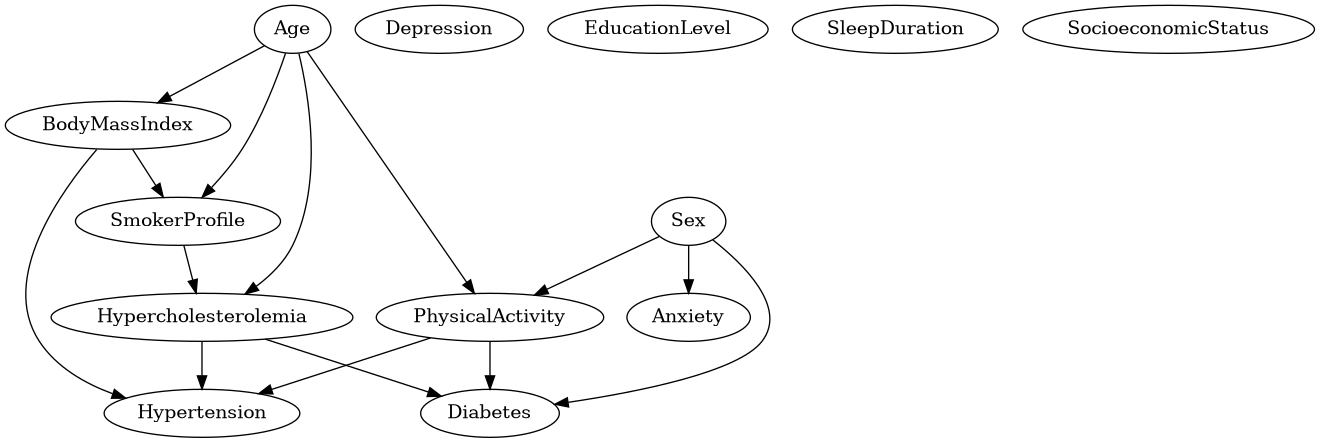

  0%|          | 0/1000000 [00:00<?, ?it/s]

BIC score: -31953.597153821356
probabilty: 0.7

Model structure for BIC:

Number of edges 13


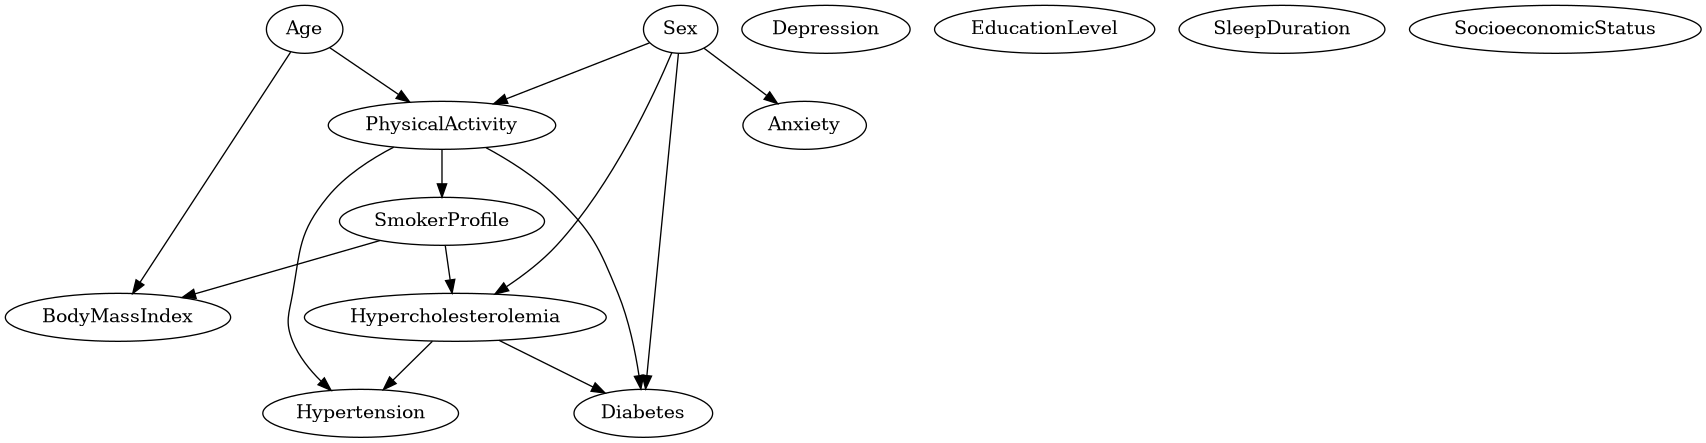

  0%|          | 0/1000000 [00:00<?, ?it/s]

BIC score: -31916.663271286925
probabilty: 0.8

Model structure for BIC:

Number of edges 14


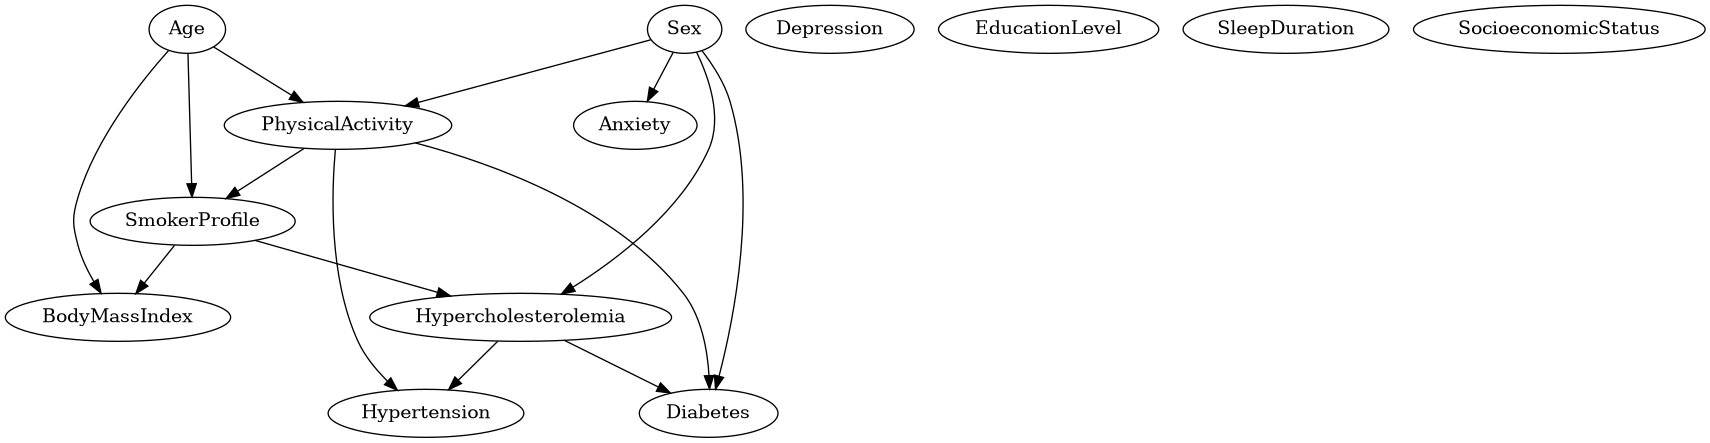

  0%|          | 0/1000000 [00:00<?, ?it/s]

BIC score: -31949.61859215034
probabilty: 0.9

Model structure for BIC:

Number of edges 13


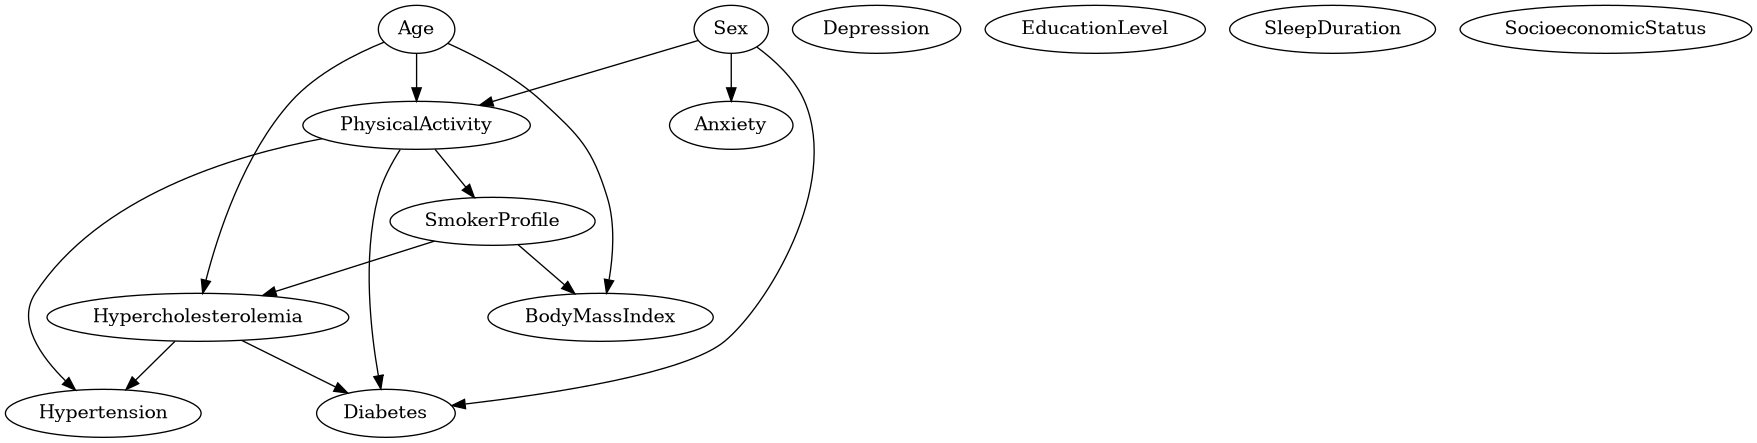

  0%|          | 0/1000000 [00:00<?, ?it/s]

BIC score: -31953.597153821356
probabilty: 0.95

Model structure for BIC:

Number of edges 13


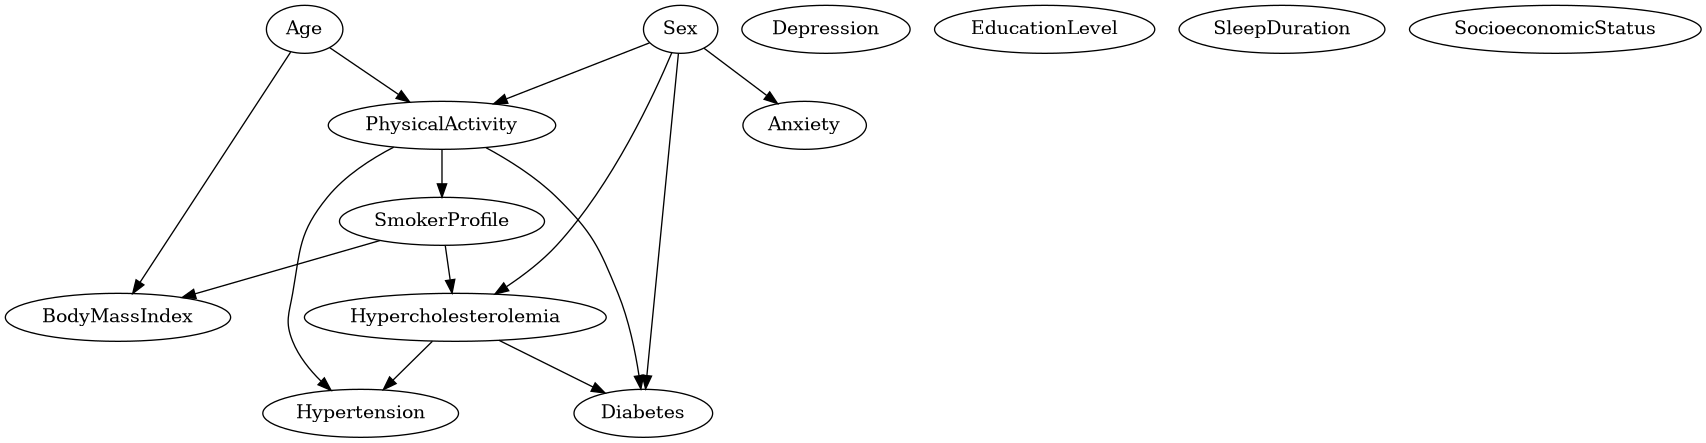

  0%|          | 0/1000000 [00:00<?, ?it/s]

BIC score: -32021.30700139989
probabilty: 0.99

Model structure for BIC:

Number of edges 12


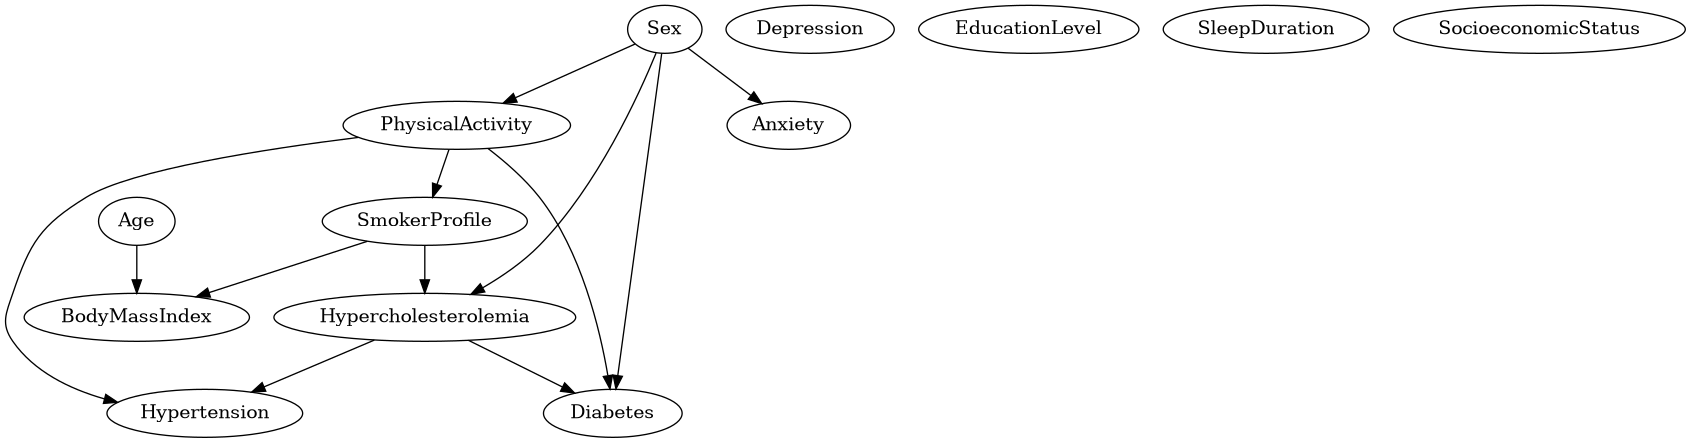

  0%|          | 0/1000000 [00:00<?, ?it/s]

BIC score: -32021.30700139989
probabilty: 1

Model structure for BIC:

Number of edges 12


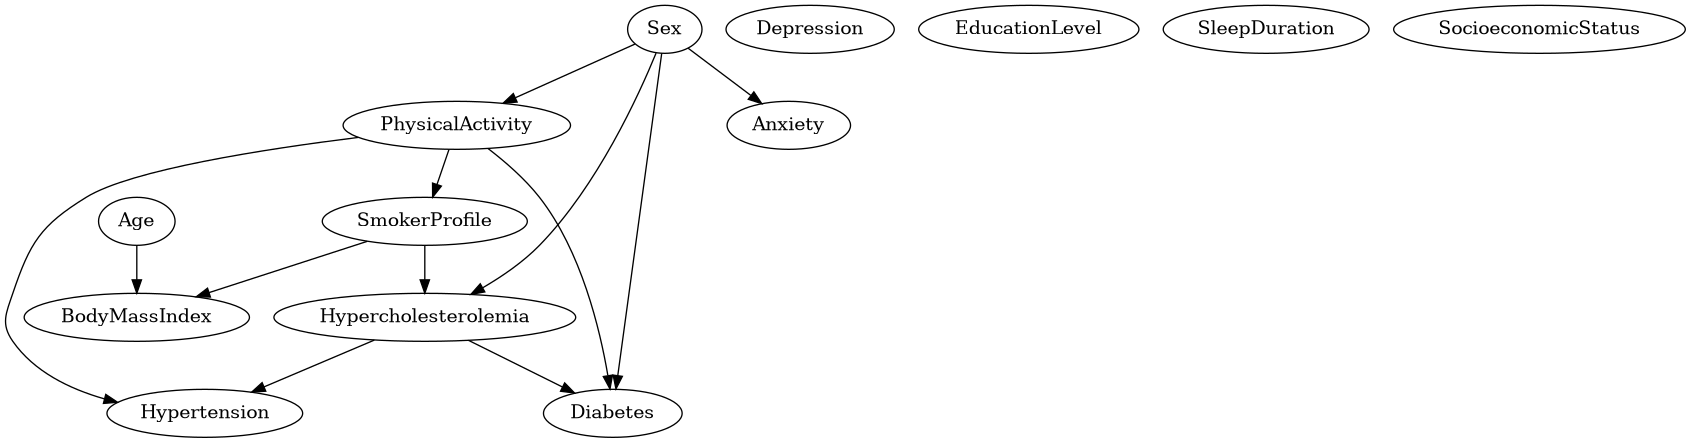

  0%|          | 0/1000000 [00:00<?, ?it/s]

AIC score: -31116.44016728619
probabilty: 0.6

Model structure for AIC:

Number of edges 23


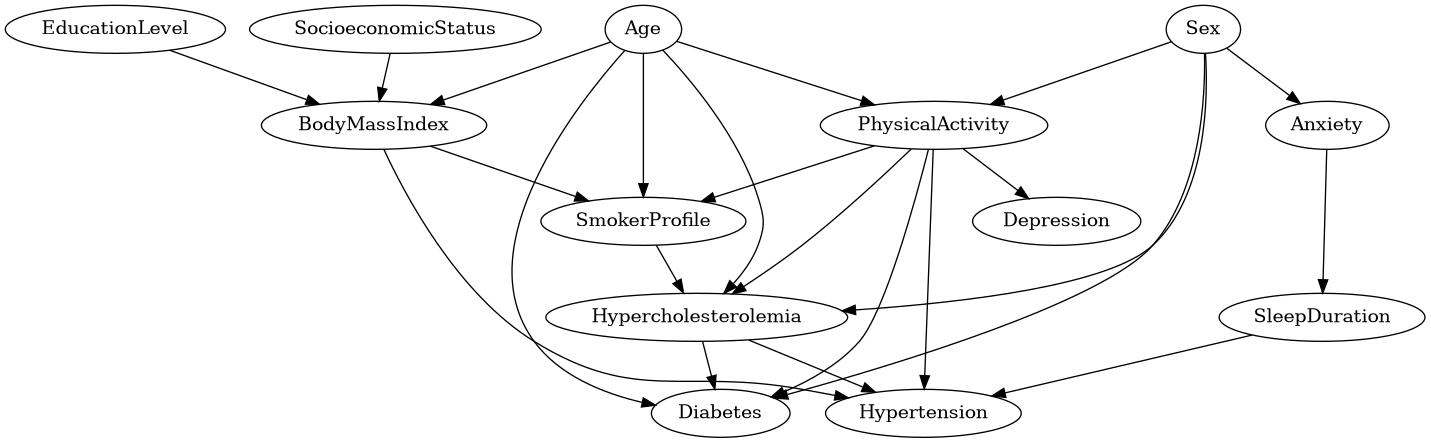

  0%|          | 0/1000000 [00:00<?, ?it/s]

AIC score: -31153.427472440017
probabilty: 0.7

Model structure for AIC:

Number of edges 24


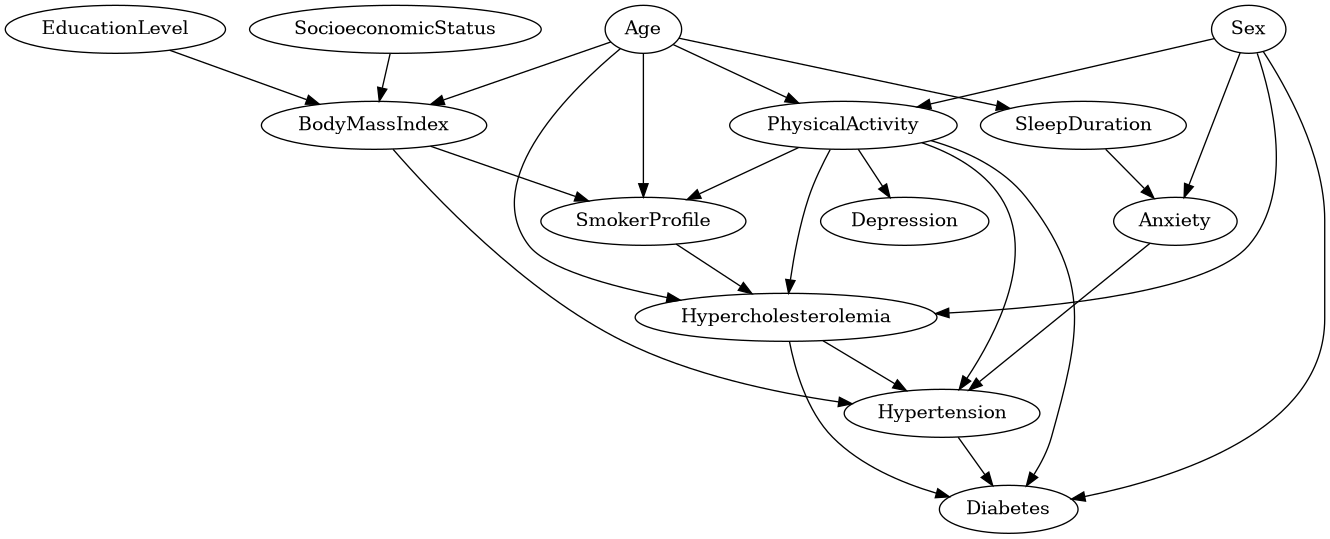

  0%|          | 0/1000000 [00:00<?, ?it/s]

AIC score: -31100.82098512779
probabilty: 0.8

Model structure for AIC:

Number of edges 24


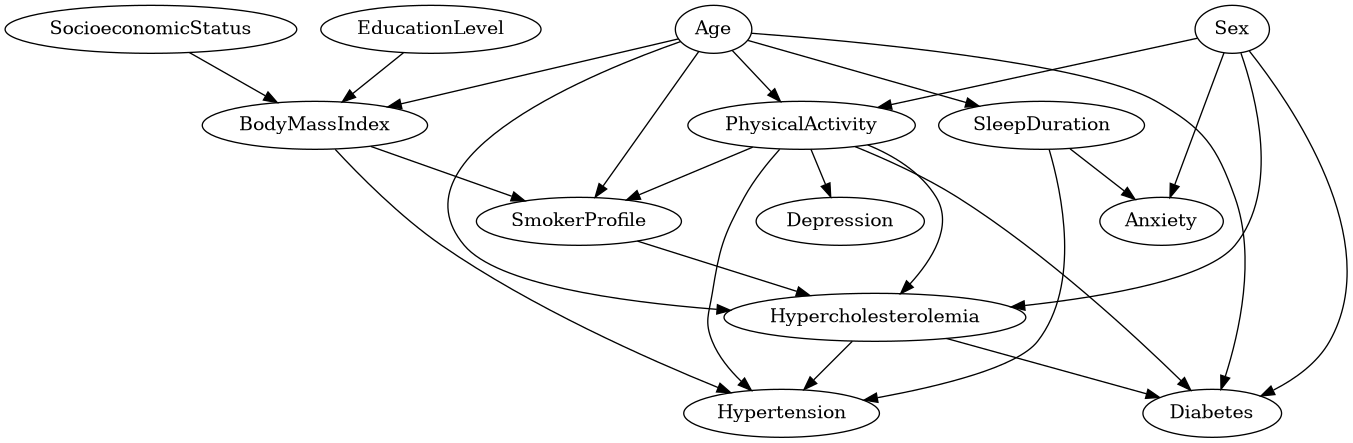

  0%|          | 0/1000000 [00:00<?, ?it/s]

AIC score: -31116.94323965964
probabilty: 0.9

Model structure for AIC:

Number of edges 23


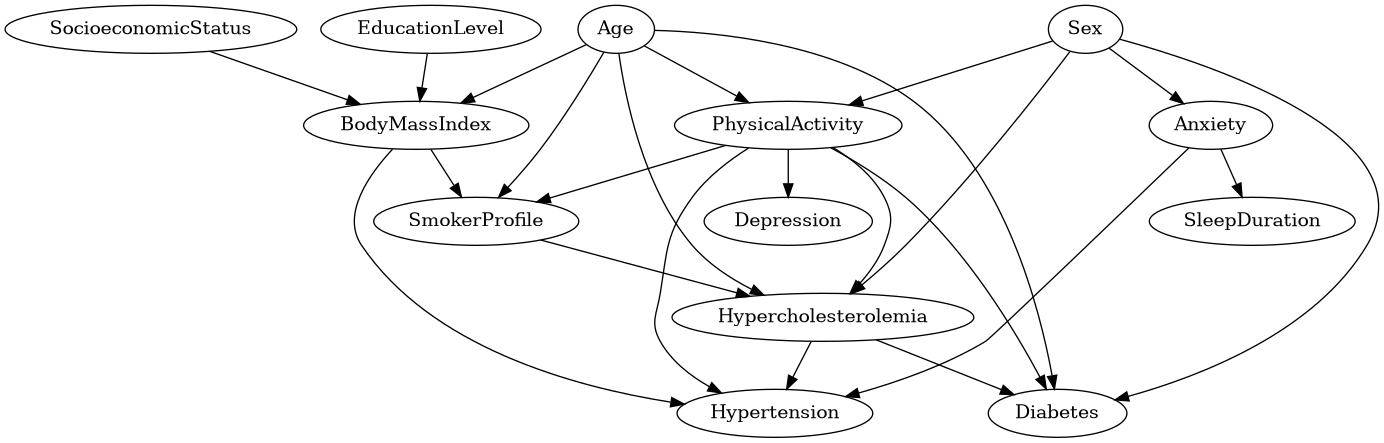

  0%|          | 0/1000000 [00:00<?, ?it/s]

AIC score: -31169.046654598416
probabilty: 0.95

Model structure for AIC:

Number of edges 23


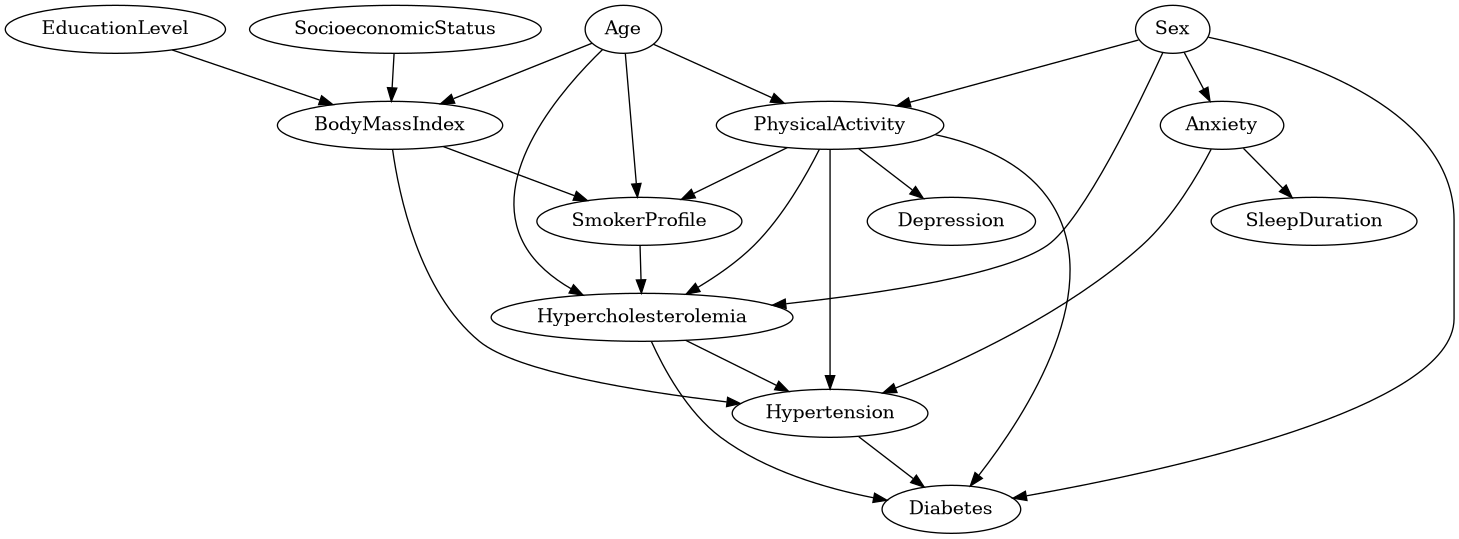

  0%|          | 0/1000000 [00:00<?, ?it/s]

AIC score: -31169.046654598416
probabilty: 0.99

Model structure for AIC:

Number of edges 23


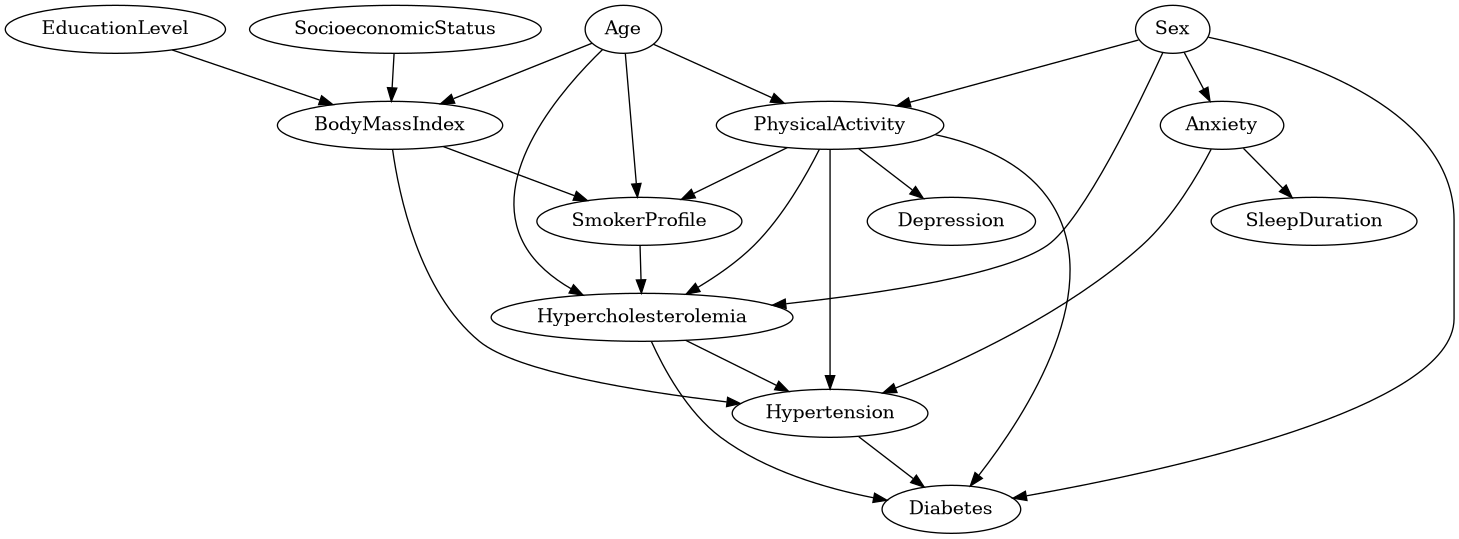

  0%|          | 0/1000000 [00:00<?, ?it/s]

AIC score: -31169.046654598416
probabilty: 1

Model structure for AIC:

Number of edges 23


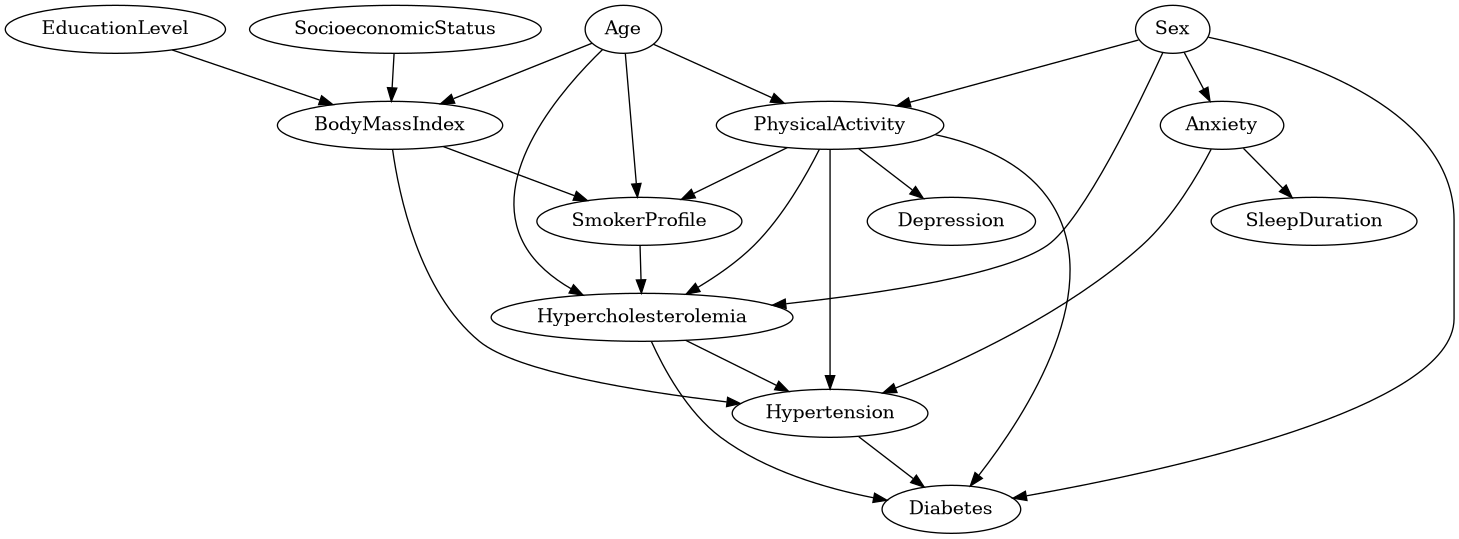

In [17]:
# Load the dataset
df = pd.read_csv('cardiovascular_train.csv')

es = HillClimbSearch(data=df)

blacklist = [
    ("EducationLevel", "Hypercholesterolemia"), 
    ("EducationLevel", "SleepDuration"),         
    ("SleepDuration", "SmokerProfile"),                          
    ("Diabetes", "PhysicalActivity")             
]

exclude_nodes = ["Diabetes", "Hypertension", "Hypercholesterolemia"]

for col in df.columns:
    for target in df.columns:
        if col != target:  
            if col in exclude_nodes and target not in exclude_nodes:
                blacklist.append((col, target))

no_incoming = ["Age", "Sex", "EducationLevel", "SocioeconomicStatus"]

for col in df.columns:
    for target in no_incoming:
        if col != target:  # Avoid self-loops
            blacklist.append((col, target))



scoring_methods = {
    "BIC": BicScore(df),
    "AIC": AICScore(df)
}

probs = [0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]

Dic = {}

count = 0

es = HillClimbSearch(data=df)

for name, score_method in scoring_methods.items():
    for p in probs:

        start_dag = initialize_graph(nodes=df.keys(), p=p, blacklist=blacklist)
        
        model = es.estimate(
            scoring_method=score_method,
            start_dag=start_dag,
            black_list=blacklist
            
        )

        score = score_method.score(model)
        print(f"{name} score: {score}")
        print("probabilty: " + str(p))
        print(f"\nModel structure for {name}:\n")
        print("Number of edges",len(model.edges()))

        m = model.to_graphviz()
        img = m.draw(format='png', prog="dot")
        display(Image(img))
        
        

### Conclusions and final model 

As can be seen from the previous results, the score is always better (lower) when the **probability** is initialised with a value close to or equal to 1. In this sense, the **DAG should be initialised with all connections**. As for the choice of `score_method`, although the logic is the same for both, i.e. the lower the better, the BIC and AIC should not be compared directly, as they are two different metrics.

It makes more sense, by visualising the Bayseian models, to see which one might be best for the problem presented.

By looking at the Bayseian Model obtained with `score_method=BIC`, and from previous knowledge, it is possible to see that this penalises the complexity of the models much more, thus obtaining a model with few connections, with some variables having no connection at all.

The AIC seeks a model that minimises the loss of information and is more tolerant of complex models. Looking at the models obtained with `score_method=AIC`, it can be seen that this penalises complexity less, leaving these models with more connections.

Given the context of the project and the variables present in the initial dataset, it makes more sense to choose a model that is not so simplified and has more connections between variables, minimising the loss of information.

The choosen The chosen `score_method` is **AIC**.

In [75]:
es = HillClimbSearch(data=df)



whitelist = [
    ("Age", "SleepDuration") 
]

exclude_nodes = ["Diabetes", "Hypertension", "Hypercholesterolemia"]

for col in df.columns:
    for target in df.columns:
        if col != target:  
            if col in exclude_nodes and target not in exclude_nodes:
                blacklist.append((col, target))

no_incoming = ["Age", "Sex", "EducationLevel", "SocioeconomicStatus"]

for col in df.columns:
    for target in no_incoming:
        if col != target:  # Avoid self-loops
            blacklist.append((col, target))


best_model = es.estimate(scoring_method=AICScore(df), start_dag=initialize_graph(nodes = df.keys(), p=1, blacklist=blacklist), fixed_edges=whitelist ,black_list= blacklist)

for edge in blacklist:
    if edge in best_model.edges():
        best_model.remove_edge(*edge)

print("Edges:", len(best_model.edges()))
print("Bayesian score:", AICScore(df).score(best_model))


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: 24
Bayesian score: -31153.427472440017


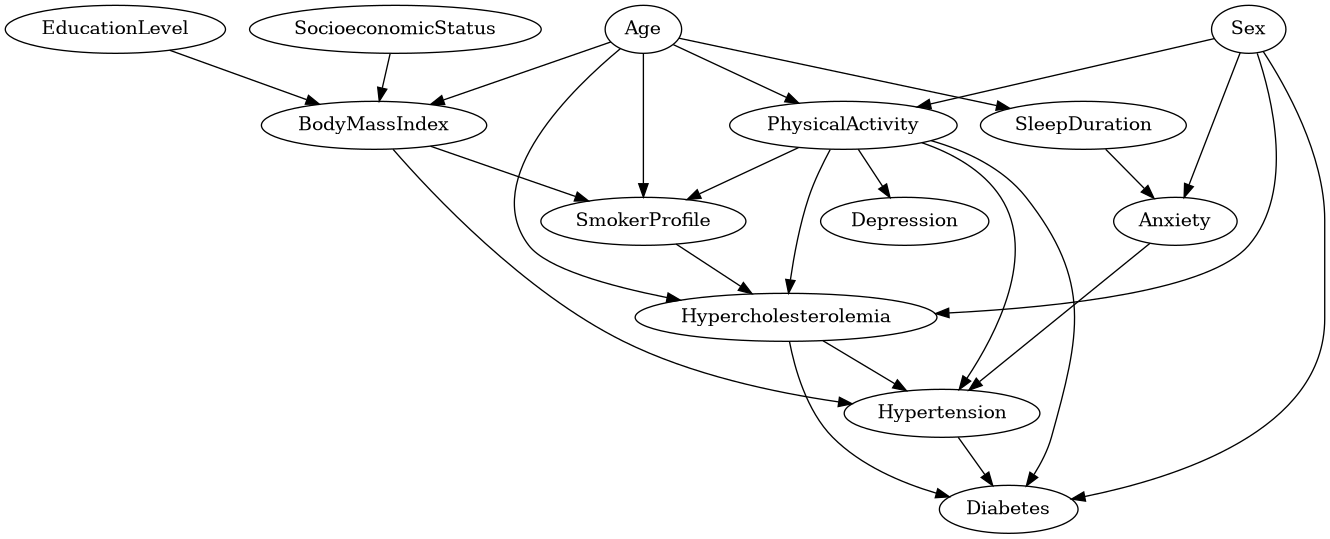

In [76]:
m = best_model.to_graphviz()
img = m.draw(format='png',prog="dot")
display(Image(img))

Above is the structure of the final model, with 23 connections (edges).

By using the blacklist, it was possible to avoid some connections that wouldn't make sense in the context of this project, and form a structure with non-modifiable variables as a starting point, and medical conditions to be influenced by various factors.

It's easy to spot some interesting connections that make sense in the context of this project:
- Anxiety → Sleep Duration
- PhysicalActivity → Hypertension
- BodyMassIndex → Hypertension
- BodyMassIndex → Hypercholesterolemia
- SmokerProfile → Hypercholesterolemia

On the other hand, there may be some unexpected connections, or even no connections that were expected:
- EducationLevel → BodyMassIndex
- SocioeconomicStatus → BodyMassIndex
- PhysicalActivity → SmokerProfile

It should always be remembered that various factors can lead to unexpected connections, or the non-existence of expected connections, such as the limited number of samples or the fact that the nature of the data itself may not provide expected predictions.

## Parameter learning

# Network and problem analysis

After constructing the Bayesian network, the relationships between variables will be analyzed to uncover meaningful insights. This step involves drawing inferences based on the learned dependencies in the network. This analysis will not only validate the structure of the model, but will also provide useful information on the interaction of these factors, supporting better decision-making in CVD risk assessment.

Below is an auxiliary function for calculating the inference and showing it in graph form.

In [77]:
# Convert best_model (DAG) to BayesianNetwork
bayesian_model = BayesianNetwork(best_model.edges())

bayesian_model.fit(df, estimator=BayesianEstimator)

# Perform Variable Elimination inference
infer = VariableElimination(bayesian_model)

In [78]:
def infer_and_plot(model, target_var, evidence_var):
    
    # Get all possible values for the evidence variable
    evidence_values = model.get_cpds(evidence_var).state_names[evidence_var]
    target_states = model.get_cpds(target_var).state_names[target_var]
    
    inference_results = {state: [] for state in target_states}

    # Perform inference for each value of the evidence variable
    for value in evidence_values:
        evidence = {evidence_var: value}
        query_result = infer.query([target_var], evidence=evidence)
        print(evidence_var + " - " +  value)
        print(query_result)
        
        # Extract the probability distribution from the query result
        probabilities = query_result.values  # Array of probabilities
        for state, prob in zip(target_states, probabilities):
            inference_results[state].append(prob)


    # Plotting the results
    for state, probabilities in inference_results.items():
        
        plt.plot(evidence_values, probabilities, marker='o', label=f"{target_var}={state}")

    plt.xticks(rotation=45)
    plt.xlabel(evidence_var)
    plt.ylabel("phi("+target_var+","+evidence_var+")")
    plt.title(f"Inference of {target_var} based on {evidence_var}")
    plt.legend()
    plt.tight_layout()
    plt.show()



## How age affects sleep duration?

Age - 18-24
+-------------------------+----------------------+
| SleepDuration           |   phi(SleepDuration) |
+=========================+======================+
| SleepDuration(6-9hours) |               0.9807 |
+-------------------------+----------------------+
| SleepDuration(<6hours)  |               0.0096 |
+-------------------------+----------------------+
| SleepDuration(>9hours)  |               0.0096 |
+-------------------------+----------------------+
Age - 24-34
+-------------------------+----------------------+
| SleepDuration           |   phi(SleepDuration) |
+=========================+======================+
| SleepDuration(6-9hours) |               0.9412 |
+-------------------------+----------------------+
| SleepDuration(<6hours)  |               0.0568 |
+-------------------------+----------------------+
| SleepDuration(>9hours)  |               0.0019 |
+-------------------------+----------------------+
Age - 34-44
+-------------------------+-------------------

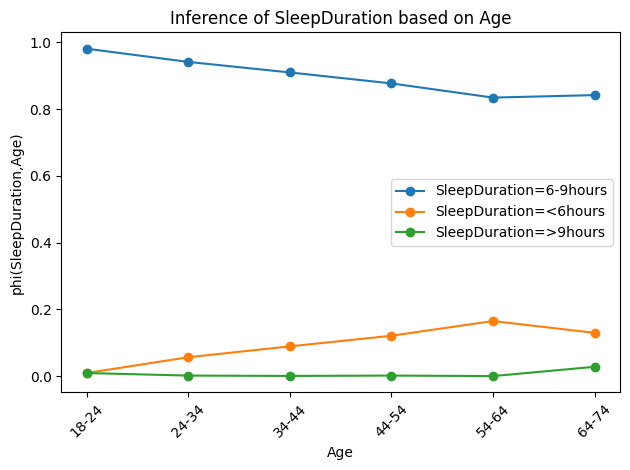

In [79]:
infer_and_plot(bayesian_model, 'SleepDuration', 'Age')

## How does the smoker profile affect the three medical conditions

SmokerProfile - Ex_Smoker
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9570 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0430 |
+---------------+-----------------+
SmokerProfile - Non_Smoker
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9546 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0454 |
+---------------+-----------------+
SmokerProfile - Smoker
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9498 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0502 |
+---------------+-----------------+


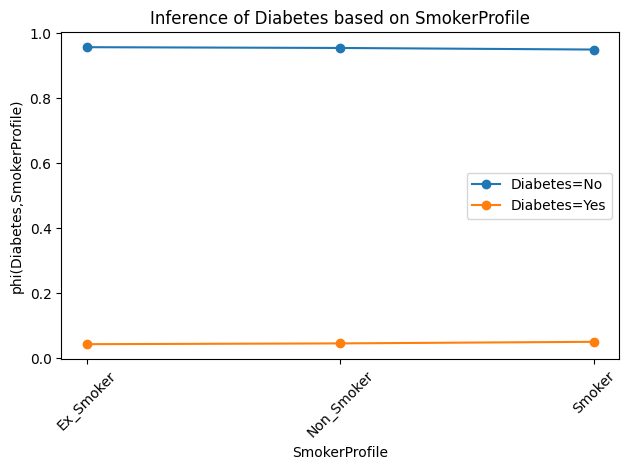

In [80]:
infer_and_plot(bayesian_model, 'Diabetes', 'SmokerProfile')

SmokerProfile - Ex_Smoker
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.8138 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.1862 |
+-------------------+---------------------+
SmokerProfile - Non_Smoker
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.8188 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.1812 |
+-------------------+---------------------+
SmokerProfile - Smoker
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.7848 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.2152 |
+-------------------+---------------------+


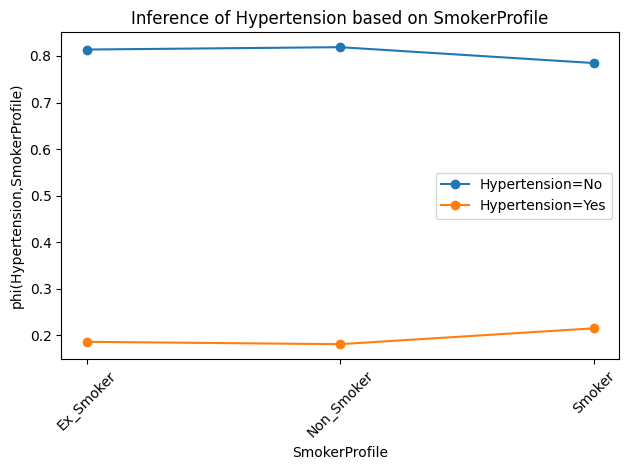

In [81]:
infer_and_plot(bayesian_model, 'Hypertension', 'SmokerProfile')

SmokerProfile - Ex_Smoker
+---------------------------+-----------------------------+
| Hypercholesterolemia      |   phi(Hypercholesterolemia) |
+===========================+=============================+
| Hypercholesterolemia(No)  |                      0.5573 |
+---------------------------+-----------------------------+
| Hypercholesterolemia(Yes) |                      0.4427 |
+---------------------------+-----------------------------+
SmokerProfile - Non_Smoker
+---------------------------+-----------------------------+
| Hypercholesterolemia      |   phi(Hypercholesterolemia) |
+===========================+=============================+
| Hypercholesterolemia(No)  |                      0.6565 |
+---------------------------+-----------------------------+
| Hypercholesterolemia(Yes) |                      0.3435 |
+---------------------------+-----------------------------+
SmokerProfile - Smoker
+---------------------------+-----------------------------+
| Hypercholesterolemia  

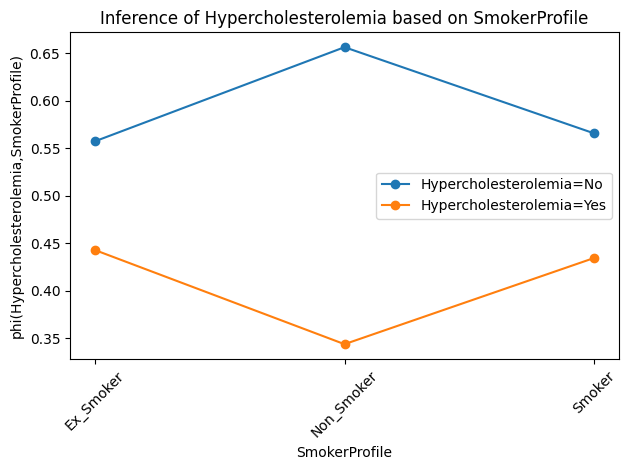

In [82]:
infer_and_plot(bayesian_model, 'Hypercholesterolemia', 'SmokerProfile')

## How body mass index affects the three medical conditions?

BodyMassIndex - Normal
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9524 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0476 |
+---------------+-----------------+
BodyMassIndex - Obese
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9544 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0456 |
+---------------+-----------------+
BodyMassIndex - Overweight
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9546 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0454 |
+---------------+-----------------+
BodyMassIndex - Underweight
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9516 |


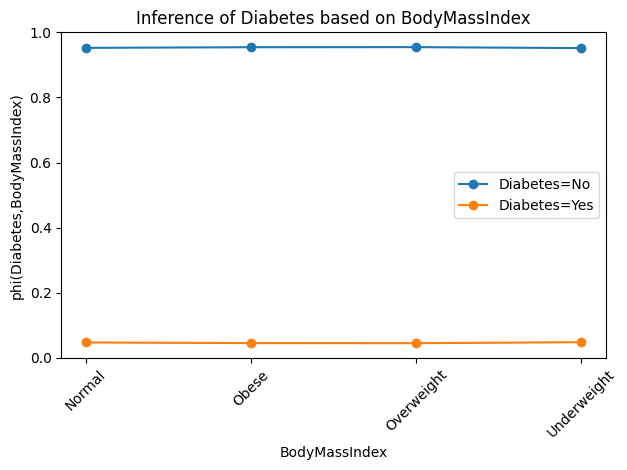

In [83]:
infer_and_plot(bayesian_model, 'Diabetes', 'BodyMassIndex')

BodyMassIndex - Normal
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.8026 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.1974 |
+-------------------+---------------------+
BodyMassIndex - Obese
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.7773 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.2227 |
+-------------------+---------------------+
BodyMassIndex - Overweight
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.8440 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.1560 |
+-------------------+---------------------+
Body

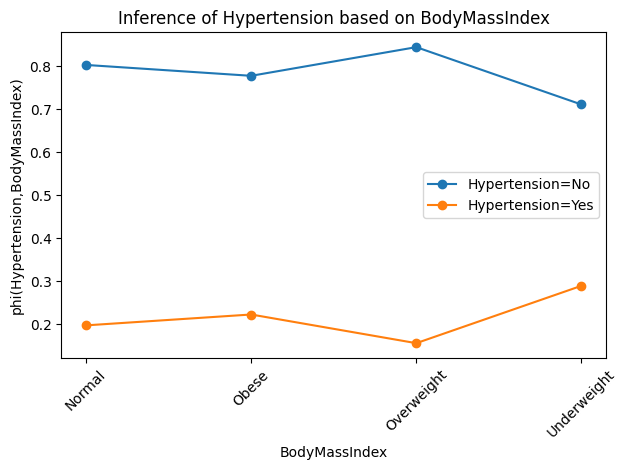

In [84]:
infer_and_plot(bayesian_model, 'Hypertension', 'BodyMassIndex')

BodyMassIndex - Normal
+---------------------------+-----------------------------+
| Hypercholesterolemia      |   phi(Hypercholesterolemia) |
+===========================+=============================+
| Hypercholesterolemia(No)  |                      0.5819 |
+---------------------------+-----------------------------+
| Hypercholesterolemia(Yes) |                      0.4181 |
+---------------------------+-----------------------------+
BodyMassIndex - Obese
+---------------------------+-----------------------------+
| Hypercholesterolemia      |   phi(Hypercholesterolemia) |
+===========================+=============================+
| Hypercholesterolemia(No)  |                      0.6534 |
+---------------------------+-----------------------------+
| Hypercholesterolemia(Yes) |                      0.3466 |
+---------------------------+-----------------------------+
BodyMassIndex - Overweight
+---------------------------+-----------------------------+
| Hypercholesterolemia      

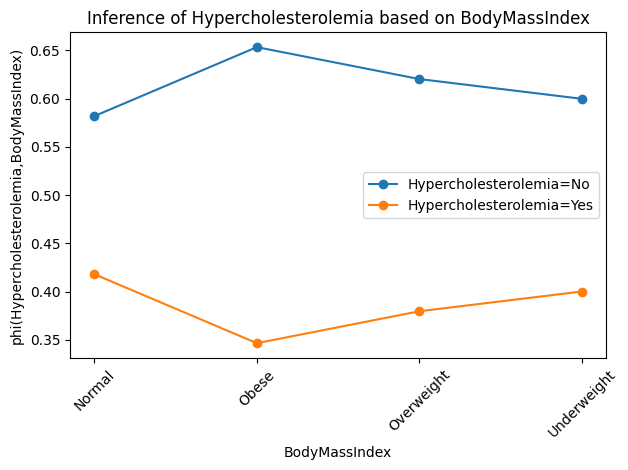

In [85]:
infer_and_plot(bayesian_model, 'Hypercholesterolemia', 'BodyMassIndex')

## How anxiety affects the sleep duration?

Anxiety - No
+-------------------------+----------------------+
| SleepDuration           |   phi(SleepDuration) |
+=========================+======================+
| SleepDuration(6-9hours) |               0.8911 |
+-------------------------+----------------------+
| SleepDuration(<6hours)  |               0.1081 |
+-------------------------+----------------------+
| SleepDuration(>9hours)  |               0.0008 |
+-------------------------+----------------------+
Anxiety - Yes
+-------------------------+----------------------+
| SleepDuration           |   phi(SleepDuration) |
+=========================+======================+
| SleepDuration(6-9hours) |               0.9191 |
+-------------------------+----------------------+
| SleepDuration(<6hours)  |               0.0737 |
+-------------------------+----------------------+
| SleepDuration(>9hours)  |               0.0072 |
+-------------------------+----------------------+


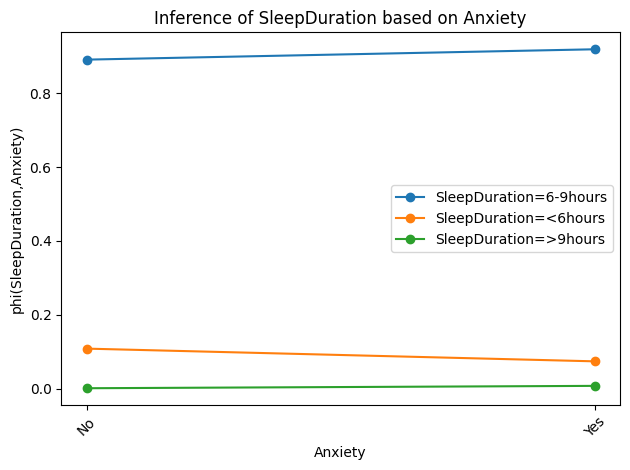

In [86]:
infer_and_plot(bayesian_model, 'SleepDuration', 'Anxiety')

## How anxiety affects the hypertension?

Anxiety - No
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.8174 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.1826 |
+-------------------+---------------------+
Anxiety - Yes
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.7325 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.2675 |
+-------------------+---------------------+


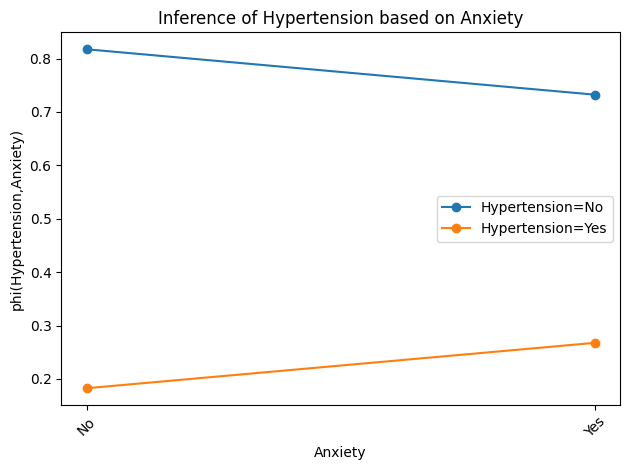

In [87]:
infer_and_plot(bayesian_model, 'Hypertension', 'Anxiety')

# Classification of the three medical conditions

# Improving classification results

# Conclusion